# Table of Contents
 <p><div class="lev2 toc-item"><a href="#lmfit" data-toc-modified-id="lmfit-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>lmfit</a></div><div class="lev2 toc-item"><a href="#bob-freq" data-toc-modified-id="bob-freq-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>bob freq</a></div><div class="lev2 toc-item"><a href="#cauchy-freq" data-toc-modified-id="cauchy-freq-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>cauchy freq</a></div><div class="lev2 toc-item"><a href="#samurai-/-IRS-freq" data-toc-modified-id="samurai-/-IRS-freq-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>samurai / IRS freq</a></div><div class="lev3 toc-item"><a href="#Cauchy-hazard-functions" data-toc-modified-id="Cauchy-hazard-functions-041"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Cauchy hazard functions</a></div>

In [1]:
# env source /Users/sebastian/work/git/stk/ml/waveforms/venv-wf/bin/activate

In [2]:
import sys

In [3]:
sys.path.append("../nonspin/")

In [4]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from waveform import SingleModeNRWaveform

/Users/sebastian/work/git/stk/ml/waveforms/venv-wf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [6]:
# load data

# nrfiles = [
#     '/Users/sebastian/work/data/SXS_BBH_0071_Res5.h5', #q=1
#     '/Users/sebastian/work/data/SXS_BBH_0169_Res5.h5', #q=2
#     '/Users/sebastian/work/data/SXS_BBH_0168_Res5.h5', #q=3
#     '/Users/sebastian/work/data/SXS_BBH_0167_Res5.h5' #q=4
# ]

# nrfiles = [
#     '/Users/sebastian/work/data/SXS_BBH_0071_Res5.h5', #q=1
#     '/Users/sebastian/work/data/SXS_BBH_0169_Res5.h5', #q=2
#     '/Users/sebastian/work/data/SXS_BBH_0167_Res5.h5', #q=4
#     '/Users/sebastian/work/data/SXS_BBH_0107_Res5.h5', #5
#     '/Users/sebastian/work/data/SXS_BBH_0303_Res5.h5' #10
# ]


nrfiles = [
    '/Users/sebastian/work/data/SXS_BBH_0169_Res5.h5', #q=2
        '/Users/sebastian/work/data/SXS_BBH_0303_Res5.h5', #10
    '/Users/sebastian/work/data/SXS_BBH_0167_Res5.h5', #q=4
        '/Users/sebastian/work/data/SXS_BBH_0107_Res5.h5', #5
    '/Users/sebastian/work/data/SXS_BBH_0071_Res5.h5' #q=1
]


In [7]:
# q1 = SingleModeNRWaveform(nrfiles[0], 2, 2, 1000)

ell = 2
mm = 2

npts_time = 1000
npts_mass_ratio = len(nrfiles)

# t1=None
# t2=None
t1=-600
t2=80

nrdata = [SingleModeNRWaveform(nrfile, ell, mm, npts_time,t1=t1,t2=t2) for nrfile in nrfiles]

In [8]:
dir(nrdata[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'amp',
 'eta',
 'get_lm_mode',
 'hlm',
 'npts',
 'nrfile',
 'phi',
 'q',
 'resample_data',
 't1',
 't2',
 'times']

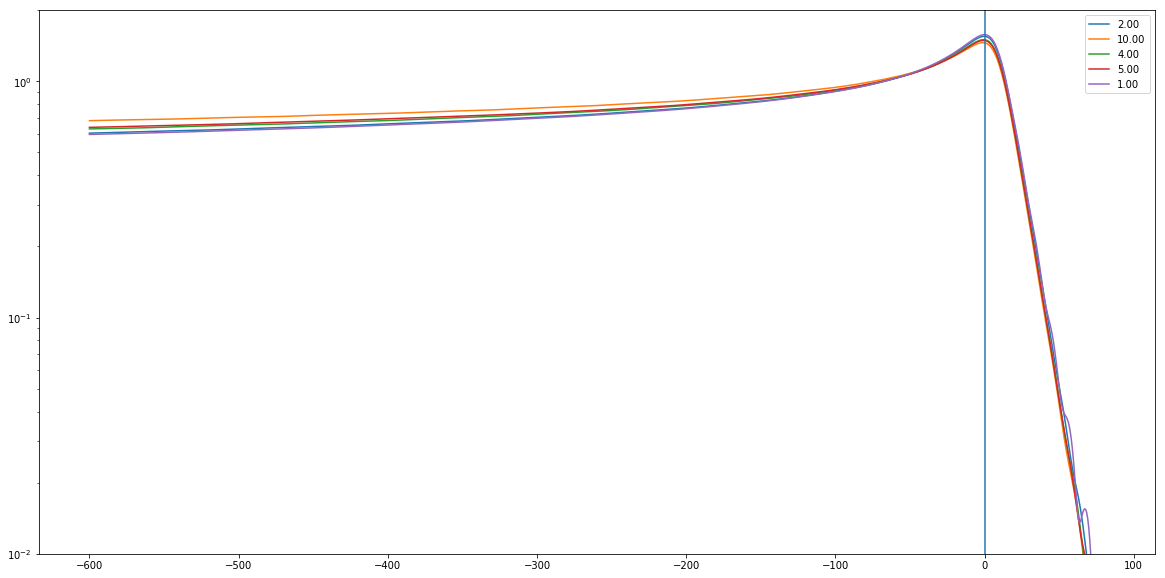

In [9]:
plt.figure(figsize=(20,10))
for nr in nrdata:
#     plt.plot(nr.times, nr.amp/nr.eta, label=nr.nrfile.split('/')[-1].split('.h5')[0])
    plt.plot(nr.times, nr.amp/nr.eta, label="{:.2f}".format(nr.q))
plt.legend()
# plt.xlim(-10,20)
plt.yscale('log')
# plt.ylim(0.5,2)
plt.ylim(1e-2,2)
plt.axvline(0)

In [10]:
ih22re = IUS(nrdata[0].times, nrdata[0].hlm.real)
ih22im = IUS(nrdata[0].times, nrdata[0].hlm.imag)

In [11]:
news22re = ih22re.derivative()(nrdata[0].times)
news22im = ih22im.derivative()(nrdata[0].times)

news22 = news22re - 1.j*news22im

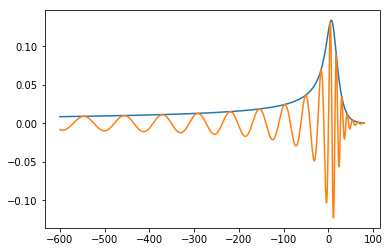

In [12]:
plt.figure()
plt.plot(nrdata[0].times, np.abs(news22))
plt.plot(nrdata[0].times, np.real(news22))
# plt.yscale('log')

In [13]:
psi422re = ih22re.derivative().derivative()(nrdata[0].times)
psi422im = ih22im.derivative().derivative()(nrdata[0].times)

psi422 = psi422re - 1.j*psi422im

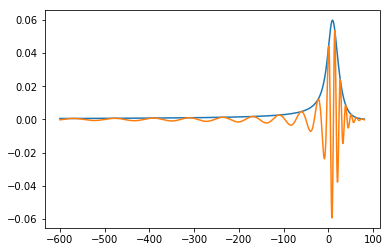

In [14]:
plt.figure()
plt.plot(nrdata[0].times, np.abs(psi422))
plt.plot(nrdata[0].times, np.real(psi422))
# plt.yscale('log')

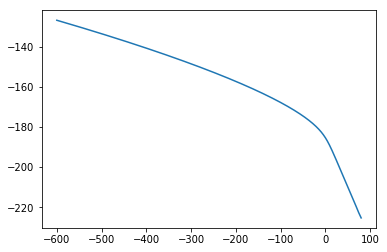

In [15]:
plt.figure()
plt.plot(nrdata[0].times, nrdata[0].phi)

In [16]:
iphi22 = IUS(nrdata[0].times, nrdata[0].phi)

In [17]:
h22freq = iphi22.derivative()(nrdata[0].times)

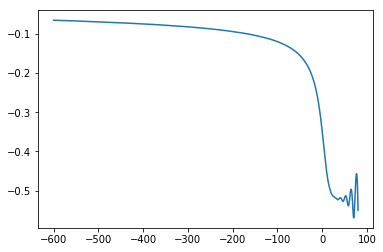

In [18]:
plt.figure()
plt.plot(nrdata[0].times, h22freq)

(-20, 40)

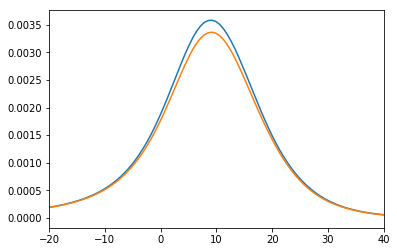

In [19]:
plt.figure()
plt.plot(nrdata[0].times, np.abs(psi422)**2)
plt.plot(nrdata[0].times, np.abs(news22)**2 * 2**2 * (h22freq/2.)**2)

plt.xlim(-20,40)

(-80, 100)

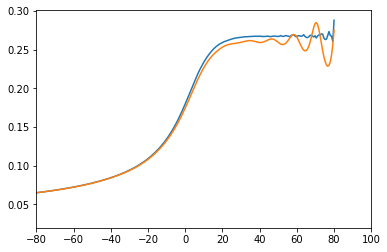

In [20]:
plt.figure()
plt.plot(nrdata[0].times, np.sqrt(np.abs(psi422)**2 / (np.abs(news22)**2 * 2**2)))
plt.plot(nrdata[0].times, np.sqrt( (h22freq/2.)**2))

plt.xlim(-80,100)

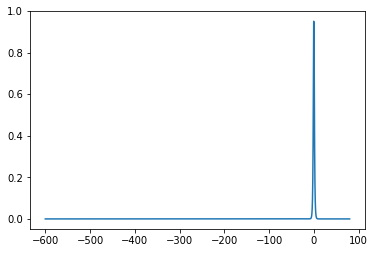

In [21]:
plt.figure()
plt.plot(nrdata[0].times, 1./np.cosh(nrdata[0].times))

(1e-06, 0.01)

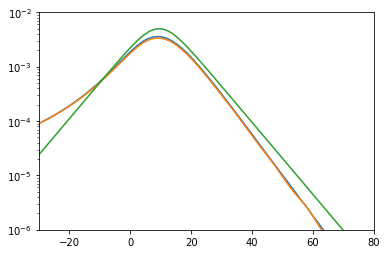

In [22]:
plt.figure()
plt.plot(nrdata[0].times, np.abs(psi422)**2)
plt.plot(nrdata[0].times, np.abs(news22)**2 * 2**2 * (h22freq/2.)**2)
plt.plot(nrdata[0].times, 1./np.cosh((0.14*1.09)*(9.5 - nrdata[0].times))/200)
plt.xlim(-30,80)
plt.yscale('log')
plt.ylim(1e-6,1e-2)

In [23]:
from scipy.optimize import least_squares

def fun_lor(x, t, y=0.):
    
    
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 )
    model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1])
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1]) + x[4]/(t-x[1])**2.
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1]) + x[4]/(t-x[1])**2. + x[5]/(t-x[1])**3.
    
    
    # poly
#     model = x[0] + x[1]/(t-x[2]) + x[2]/(t-x[2])**2
    
    return (model) - y

def fun_bob(x, t, y=0.):
#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2]
    sech = 1./np.cosh((x[1] - t)*x[0])
    model = x[2] * sech
    return (model) - y

def fun_rd(x, t, y=0.):
#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2]
#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2] * np.exp(-x[3]*t)*x[4]
#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2] + x[3]*t**(2.) + x[4]*t**(4.)
#     model = x[0] + x[1]*t + x[2]*t**2 + x[3]*t**3 + x[4]*t**4 + x[5]*t**5
#     model = x[0]*np.exp(t**2*x[1])


#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2] +  1./np.cosh((x[3])*(x[4] - t))/x[5]
#     model = 1./np.cosh((x[0])*(x[1] - t))/x[2] * ( x[5] * np.exp(x[0] - x[3]) * (x[4] -t) )
    model = x[1] * np.exp(-x[0] *(t-x[2]) )
    return (model) - y

# x0 = np.array([1.0, 1.0, 30.0])
# x0 = np.array([1.0, 1.0])
# x0 = np.array([1.0, 1.0, 1.0,1.,1])
# x0 = np.array([1.0, 1.0, 1.0,1,1,1])
# x0 = np.array([1.0, 1.0, 1.0,1,-20,1])
# x0 = np.array([1.0, 1.0, 1.0,-1,1,1])
# x0 = np.array([1.0, 1.0, 1.0,1])

# mask = (nrdata[0].times > -400) & (nrdata[0].times < -8)
# mask = (nrdata[0].times > -300) & (nrdata[0].times < -4)
mask = (nrdata[0].times > -100) & (nrdata[0].times < -4)
# mask = (nrdata[0].times > -400) & (nrdata[0].times < -100) # for poly
t_train_lor = nrdata[0].times[mask]
# y_train_lor = np.abs(psi422[mask])**2
y_train_lor = np.abs(psi422[mask])


# x0 = np.array([20.0, 1.0,20])
# x0 = np.array([20.0, 1.0,20,1])
# x0 = np.array([20.0, 1.0,20,1,1])
# x0 = np.array([20.0, 1.0,20,np.random.rand(),np.random.rand()])
# x0 = np.array([20.0, 1.0,20,np.random.rand(),np.random.rand(),np.random.rand()])
x0 = np.array([20.0, 1.0,20,np.random.rand(),np.random.rand()])
res_lor_lsq = least_squares(fun_lor, x0, args=(t_train_lor, y_train_lor))



# mask = (nrdata[0].times > -10) & (nrdata[0].times < 30)
mask = (nrdata[0].times > -20+10) & (nrdata[0].times < 60+10)
t_train_bob = nrdata[0].times[mask]
# y_train_bob = np.abs(psi422[mask])**2
y_train_bob = np.abs(psi422[mask])


# x0 = np.array([1.0, 1.0, 1.0])
# x0 = np.array([np.random.rand(),np.random.rand(),np.random.rand()])
x0 = np.array([np.random.rand()/2,np.random.rand(),np.random.rand()])
res_bob_lsq = least_squares(fun_bob, x0, args=(t_train_bob, y_train_bob))


mask = (nrdata[0].times > 30) & (nrdata[0].times < 60)
# mask = (nrdata[0].times > 40) & (nrdata[0].times < 80)
t_train_rd = nrdata[0].times[mask]
# y_train_rd = np.abs(psi422[mask])**2
y_train_rd = np.abs(psi422[mask])

# x0 = np.array([1.0, 1.0, 30.0])
x0 = np.array([np.random.rand(), np.random.rand()*1e-5, 40])
# x0 = np.array([np.random.rand(), 1.0, 30.0])
res_rd_lsq = least_squares(fun_rd, x0, args=(t_train_rd, y_train_rd))

In [24]:
res_rd_lsq.x[0]

0.08595430572288129

In [25]:
res_lor_lsq.x

array([13.68648063,  9.16460184,  0.37680773, -0.25923775,  0.32605134])

In [26]:
1./9.371

0.10671219720414042

In [27]:
res_bob_lsq.x

array([0.08920795, 9.00040271, 0.05927203])

In [28]:
# damping time is 1./gamma
damping_time = res_bob_lsq.x[0]

tp_amp = res_bob_lsq.x[1]
print(damping_time)
print(tp_amp)

0.08920794736535576
9.000402708241024


In [29]:
damping_time

0.08920794736535576

In [30]:
1./damping_time

11.209763586471151

In [31]:
res_rd_lsq.x

array([8.59543057e-02, 6.93905132e-03, 4.10034242e+01])

In [32]:
model_times = np.linspace(-100,100, 1000)

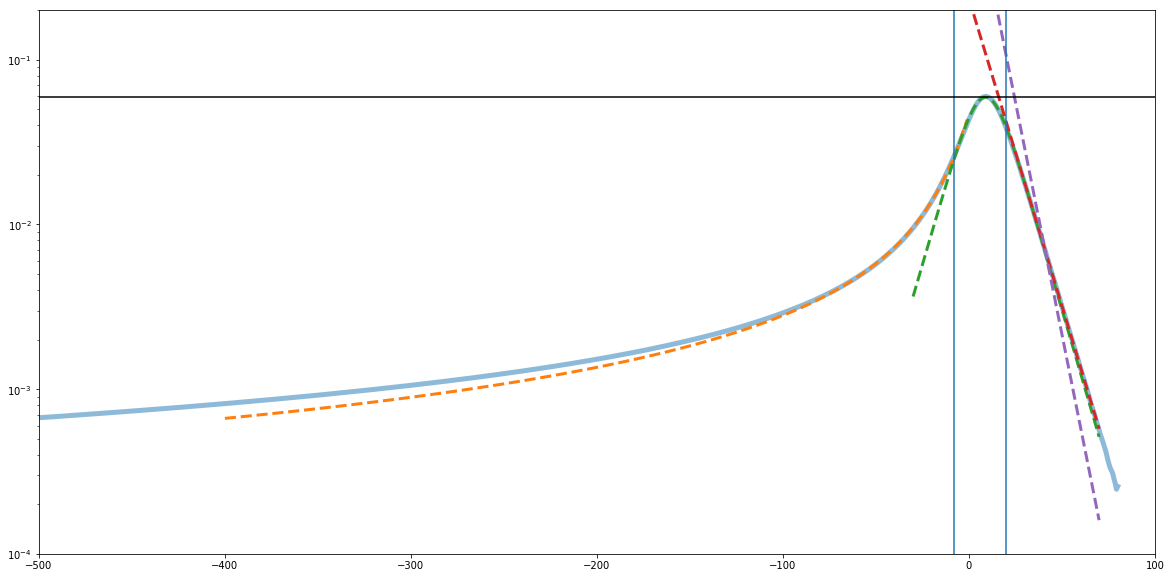

In [33]:
plt.figure(figsize=(20,10))
# plt.figure()
# plt.plot(nrdata[0].times, np.abs(psi422)**2, lw=5, alpha=0.5)
plt.plot(nrdata[0].times, np.abs(psi422), lw=5, alpha=0.5)
# plt.plot(nrdata[0].times, np.abs(news22)**2 * 2**2 * (h22freq/2.)**2)
# plt.plot(nrdata[0].times, fun_bob(res_bob_lsq.x, nrdata[0].times, 0))


# fit regions
# plt.plot(t_train_lor, fun_lor(res_lor_lsq.x, t_train_lor, 0), lw=3, ls='--')
# plt.plot(t_train_bob, fun_bob(res_bob_lsq.x, t_train_bob, 0), lw=3, ls='--')
# plt.plot(t_train_rd, fun_rd(res_rd_lsq.x, t_train_rd, 0), lw=3, ls='--')


# extrapolated regions

lor_times_extrap = np.linspace(-400, -1, 100)
plt.plot(lor_times_extrap, fun_lor(res_lor_lsq.x, lor_times_extrap, 0), lw=3, ls='--')

bob_times_extrap = np.linspace(-30, 70, 100)
plt.plot(bob_times_extrap, fun_bob(res_bob_lsq.x, bob_times_extrap, 0), lw=3, ls='--')


rd_times_extrap = np.linspace(-10, 70, 100)
plt.plot(rd_times_extrap, fun_rd(res_rd_lsq.x, rd_times_extrap, 0), lw=3, ls='--')


### xisco
# 1st overtone
rd_times_extrap = np.linspace(-10, 70, 100)
plt.plot(rd_times_extrap, fun_rd([0.26/2,res_rd_lsq.x[1],res_rd_lsq.x[2]], rd_times_extrap, 0), lw=3, ls='--')
### xisco

# plt.plot(model_times, fun_bob(res_bob_lsq.x, model_times, 0))
# plt.plot(model_times, fun_rd(res_rd_lsq.x, model_times, 0))

plt.xlim(-500,100)
# plt.xlim(-20,100)
plt.yscale('log')
plt.ylim(1e-4,2e-1)

plt.axvline(-18+10)
plt.axvline(10+10)



plt.axhline(res_bob_lsq.x[2], c='k')

In [34]:
import phenom

eta, chi1z, chi2z = nrdata[0].eta, 0., 0.
fin_spin = phenom.remnant.FinalSpin0815(eta, chi1z, chi2z)

fring = phenom.remnant.fring(eta, chi1z, chi2z, fin_spin)

fdamp = phenom.remnant.fdamp(eta, chi1z, chi2z, fin_spin)


print("ringdown frequency in geometric units = ", fring)
print("imaginary part of the ringdown frequency = ", fdamp)


('ringdown frequency in geometric units = ', 0.08314855664946913)
('imaginary part of the ringdown frequency = ', 0.013773995415533353)


In [35]:
fring * 2 * np.pi

0.5224377894531339

(0.49, 0.57)

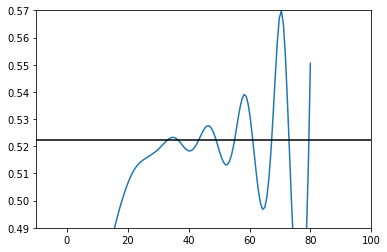

In [36]:
plt.figure()
plt.plot(nrdata[0].times, -h22freq)
plt.axhline(fring * 2 * np.pi, c='k')
plt.xlim(-10,100)
plt.ylim(0.49,0.57)

In [37]:
1-phenom.remnant.EradRational0815(0.25,0,0)

0.9516120942660409

In [38]:
fring * (1.-phenom.remnant.EradRational0815(0.25,0,0))

0.07912517212839985

In [39]:
fdamp * (1. - phenom.remnant.EradRational0815(0.25,0,0))

0.013107500623786541

In [40]:
2 * fdamp * (2 * np.pi)

0.17308913123207628

In [41]:
fdamp * (2 * np.pi)

0.08654456561603814

In [42]:
res_rd_lsq.x[0]

0.08595430572288129

In [43]:
damping_time

0.08920794736535576

In [44]:
res_rd_lsq.x[0]/damping_time

0.9635274463927636

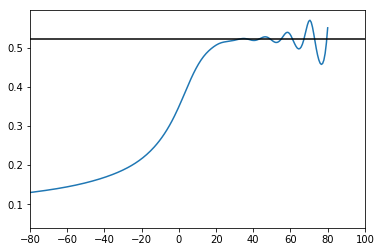

In [45]:
plt.figure()
plt.plot(nrdata[0].times, -h22freq)
plt.xlim(-80,100)

plt.axhline(fring * 2 * np.pi, c='k')

In [46]:
# frequency and phase

In [47]:
def omega_orb(t, t0, tp, tau, f_rd, om_0):
    
    om_rd = f_rd / 2.
    
    dt = t - tp
    dt_tau = dt / tau
    dt0 = t0 - tp
    dt0_tau = dt0 / tau
    k_num = om_rd**4. - om_0**4.
    k_den = 1 - np.tanh( dt0_tau )
    k = k_num / k_den
    
    t1 = np.tanh(dt_tau)
    t2 = np.tanh(dt0_tau)
    
    return (om_0**4. + k * (t1-t2))**(1./4)

In [48]:
ttt = np.linspace(-100,100,10000)

In [49]:
oms = omega_orb(ttt, 10, 0, 1./damping_time, fring, 0.1)

(-100, 100)

<Figure size 432x288 with 0 Axes>

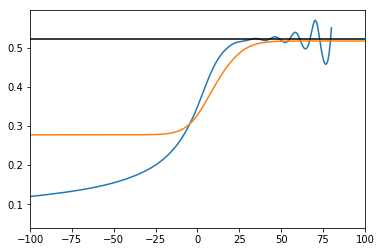

In [50]:
plt.figure()
plt.figure()
plt.plot(nrdata[0].times, -h22freq)
plt.axhline(fring * 2 * np.pi, c='k')

plt.plot(ttt, -2.*(oms - 0.3)  )
plt.xlim(-100,100)

In [51]:

def fun_om(x, t, y=0.):
    
    
    tau = 1./damping_time
    f_rd = fring

    t0 = x[0]
    tp = x[1]
    om_0 = x[2]
    
    om_rd = f_rd / 2.
    
    dt = t - tp
    dt_tau = dt / tau
    dt0 = t0 - tp
    dt0_tau = dt0 / tau
    k_num = om_rd**4. - om_0**4.
    k_den = 1 - np.tanh( dt0_tau )
    k = k_num / k_den
    
    t1 = np.tanh(dt_tau)
    t2 = np.tanh(dt0_tau)
    
    model = (om_0**4. + k * (t1-t2))**(1./4.)
    
    
    return (model) - y



mask = (nrdata[0].times > -50) & (nrdata[0].times < 25)
t_train_om = nrdata[0].times[mask]
y_train_om = -h22freq[mask]


# bounds = ([-20, 20], [-20, 20], [0.05,0.3])

# bounds = ([-20,-20,0.05],[20,20,0.3])
bounds = ([-2, 0,-1],[10,2,1])

x0 = np.array([np.random.rand(),np.random.rand(),np.random.rand()])
res_om_lsq = least_squares(fun_om, x0, args=(t_train_om, y_train_om),
                           bounds=bounds
                          )

In [52]:
res_om_lsq.x

array([1.23759643, 2.        , 0.2552736 ])

(-100, 100)

<Figure size 432x288 with 0 Axes>

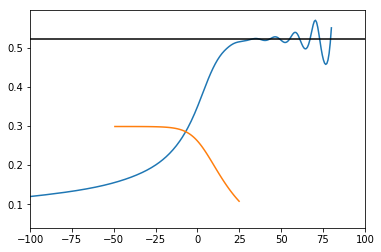

In [53]:
plt.figure()
plt.figure()
plt.plot(nrdata[0].times, -h22freq)
plt.axhline(fring * 2 * np.pi, c='k')

plt.plot(t_train_om, fun_om(res_om_lsq.x, t_train_om, 0)  )
plt.xlim(-100,100)

## lmfit

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 301
    # variables        = 4
    chi-square         = 10.1774055
    reduced chi-square = 0.03426736
    Akaike info crit   = -1011.46899
    Bayesian info crit = -996.640545
[[Variables]]
    amp:    5.04732161 +/- 0.03677308 (0.73%) (init = 10)
    decay:  0.02542942 +/- 4.2329e-04 (1.66%) (init = 0.1)
    shift: -0.09778759 +/- 0.00935956 (9.57%) (init = 0)
    omega:  1.99899448 +/- 0.00301379 (0.15%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.785
    C(amp, decay)   =  0.584
    C(amp, shift)   = -0.120


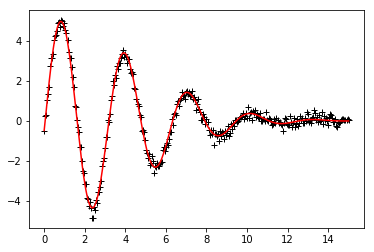

In [54]:
import numpy as np

from lmfit import Minimizer, Parameters, report_fit

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=x.size, scale=0.2))


# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
params.add('omega', value=3.0)

# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()

## bob freq

In [55]:
skip = True
if not skip:

    import lmfit

    # try my case
    mask = (nrdata[0].times > -50) & (nrdata[0].times < 25)
    x = nrdata[0].times[mask]
    data = -h22freq[mask]


    # define objective function: returns the array to be minimized
    def fcn2min(params, x, data):    
        t=x

        tau = params['tau'] #damping_time
        f_rd = params['f_rd'] #fring

        t0 = params['t0']
        tp = params['tp']
        om_0 = params['om_0']

        om_rd = f_rd / 2

        dt = t - tp
        dt_tau = dt / tau
        dt0 = t0 - tp
        dt0_tau = dt0 / tau
        k_num = om_rd**4. - om_0**4.
        k_den = 1 - np.tanh( dt0_tau )
        k = k_num / k_den
    #     if k_num < 0:
    #         print(om_0.value)
    #         print("k = ", k)
    #         print("om_rd = ",om_rd**4)
    #         print("om_0 = ", om_0.value**4)
    #     print(k)
    #     print(k_num)
    #     print(k_den)

        t1 = np.tanh(dt_tau)
        t2 = np.tanh(dt0_tau)

    #     print(t1)
    #     print(t2)
    #     print(t2)

    #     for i in range(len(t1)):
    #         if t2>t1[i]:
    #             print("llflf")

        model = (om_0**4. + k * (t1-t2))**(1./4.) #+ params['offset']


        return model - data



    # create a set of Parameters
    params = Parameters()
    params.add('tau', value=-(1./damping_time), vary=False)
    # params.add('f_rd', value=fring*2*np.pi, vary=False)
    params.add('f_rd', value=0.10570425, vary=False)

    # params.add('tau', value=-(1./damping_time), min=-0.9*(1./damping_time), max=-1.2*(1./damping_time))
    # params.add('f_rd', value=fring*2*np.pi, min=0.9*fring, max=1.2*fring)
    # params.add('tau', value=3, min=2, max=20)
    # params.add('f_rd', value=3, min=2, max=20)
    params.add('t0', value=0., min=-10, max=20)
    params.add('tp', value=tp_amp, vary=False)
    params.add('om_0', value=0.2, min=-0.01, max=0.5)

    # params.add('offset', value=0.2, min=-0.2, max=0.3)
    # params.add('om_0', value=0.2, vary=False)



    # do fit, here with the default leastsq algorithm
    # minner = Minimizer(fcn2min, params, fcn_args=(x, data), nan_policy='omit')
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))

    result = minner.minimize()

    # calculate final result
    final = data + result.residual

    # write error report
    report_fit(result)

    # try to plot results
    plt.plot(x, data, 'k+')
    plt.plot(x, final, 'r')
    plt.axvline(tp_amp)
    plt.show()

## cauchy freq

In [56]:
# actually the frequency also looks like a Cauchy on the left and then a tanh on the right

In [57]:
damping_time

0.08920794736535576

In [58]:
-(1./damping_time)

-11.209763586471151

In [59]:
fring*2*np.pi

0.5224377894531339

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 294
    # variables        = 4
    chi-square         = 2.9308e-04
    reduced chi-square = 1.0106e-06
    Akaike info crit   = -4054.68123
    Bayesian info crit = -4039.94691
[[Variables]]
    a:  80.7994171 +/- 0.59630298 (0.74%) (init = 20)
    b:  49.1304184 +/- 0.27972012 (0.57%) (init = 20)
    c: -39.2945294 +/- 0.27509571 (0.70%) (init = 0)
    d: -34.4752870 +/- 0.18418784 (0.53%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.985
    C(c, d) =  0.977
    C(a, d) = -0.940
    C(b, d) = -0.913
    C(a, c) = -0.855
    C(b, c) = -0.809


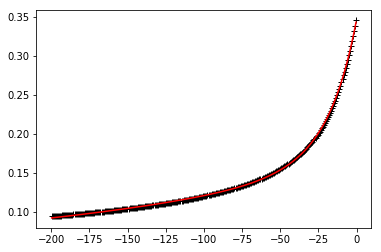

In [60]:
import lmfit

# try my case
mask = (nrdata[0].times > -200) & (nrdata[0].times < 0)
x = nrdata[0].times[mask]
data = -h22freq[mask]


# define objective function: returns the array to be minimized
def fcn2min(params, x, data):    
    t=x
    
    a = params['a']
    b = params['b']
    c = params['c']
    d = params['d']
#     e = params['e']
    
    
#     model = (a*c) / ( (t-b)**2 + a**2 )
    model = (a*c) / ( (t-b)**2 + a**2 ) + d/(t-b)
#     model = (a*c) / ( (t-b)**2 + a**2 ) + d/(t-b) + e/(t-b)**2
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1])
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1]) + x[4]/(t-x[1])**2.
#     model = (x[0]*x[2]) / ( (t-x[1])**2 + x[0]**2 ) + x[3]/(t-x[1]) + x[4]/(t-x[1])**2. + x[5]/(t-x[1])**3.
    
    
    return model - data



# create a set of Parameters
params = Parameters()
params.add('a', value=20., min=1, max=2000)
params.add('b', value=20, min=0, max=105)
params.add('c', value=0., min=-200, max=10000)
params.add('d', value=0., min=-200, max=200)
# params.add('e', value=0., min=-200, max=10000)


# do fit, here with the default leastsq algorithm
# minner = Minimizer(fcn2min, params, fcn_args=(x, data), nan_policy='omit')
minner = Minimizer(fcn2min, params, fcn_args=(x, data))

result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()

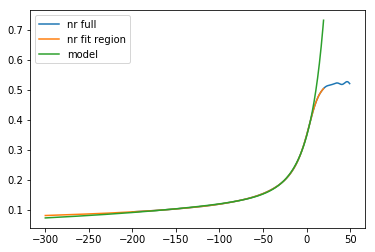

In [61]:

plt.figure()

mask = (nrdata[0].times > -200) & (nrdata[0].times < 50)
plt.plot(nrdata[0].times[mask], -h22freq[mask], label='nr full')

mask = (nrdata[0].times > -300) & (nrdata[0].times < 20)
plt.plot(nrdata[0].times[mask], -h22freq[mask], label='nr fit region')
xx = nrdata[0].times[mask]
plt.plot(xx,fcn2min(result.params, xx, 0), label='model')
plt.legend()

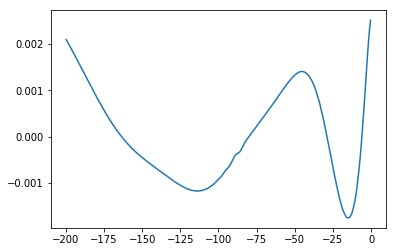

In [62]:

plt.figure()

mask = (nrdata[0].times > -200) & (nrdata[0].times < 0)
xx = nrdata[0].times[mask]
plt.plot(xx, -h22freq[mask] - fcn2min(result.params, xx, 0))

## samurai / IRS freq

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 88
    # variables        = 1
    chi-square         = 4.2525e-04
    reduced chi-square = 4.8879e-06
    Akaike info crit   = -1075.13478
    Bayesian info crit = -1072.65744
[[Variables]]
    t0:      9.000403 (fixed)
    kappa:   0.36 (fixed)
    b:       10 (fixed)
    om_f:    0.5224378 (fixed)
    offset:  0.17688095 +/- 5.2612e-04 (0.30%) (init = 0)


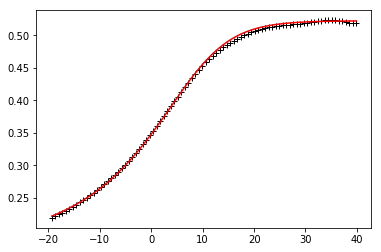

In [63]:
import lmfit

# try my case
mask = (nrdata[0].times > -20) & (nrdata[0].times < 40)
x_sam = nrdata[0].times[mask]
data_sam = -h22freq[mask]


# define objective function: returns the array to be minimized
def fcn2min_sam(params, x, data):    
    t=x
    
    t0 = params['t0']
    kappa = params['kappa']
    b = params['b']
    om_f = params['om_f']
    offset = params['offset']
    
    dt = t - t0
    
#     num = 1. + np.tanh(np.log(np.sqrt(kappa)) - (dt/b))
    num = 1. + np.tanh((dt/b))
    den = 2.
    
    model = offset + (om_f - offset) * (num/den)**kappa

    return model - data



# create a set of Parameters
params_sam = Parameters()
# params_sam.add('t0', value=5., min=-10, max=200)
params_sam.add('t0', value=tp_amp, vary=False)
# params_sam.add('kappa', value=1, min=1e-9, max=10)
# params_sam.add('kappa', value=0.25, vary=False) # bob value?
params_sam.add('kappa', value=0.36, vary=False) # best fit value?
# params_sam.add('b', value=1., min=1e-8, max=30)
params_sam.add('b', value=10., vary=False)
# fixing b is ok but fitting is better
# params_sam.add('b', value=2./damping_time, vary=False)
# params_sam.add('om_f', value=fring * np.pi * 2, min=0.02, max=1)
params_sam.add('om_f', value=fring * np.pi * 2, vary=False)
params_sam.add('offset', value=0., min=-200, max=200)


# do fit, here with the default leastsq algorithm
minner_sam = Minimizer(fcn2min_sam, params_sam, fcn_args=(x_sam, data_sam))

result_sam = minner_sam.minimize()

# calculate final result
final_sam = data_sam + result_sam.residual

# write error report
report_fit(result_sam)

# try to plot results
plt.plot(x_sam, data_sam, 'k+')
plt.plot(x_sam, final_sam, 'r')
# plt.yscale('log')
plt.show()

In [64]:
1./ (damping_time)

11.209763586471151

In [65]:
damping_time

0.08920794736535576

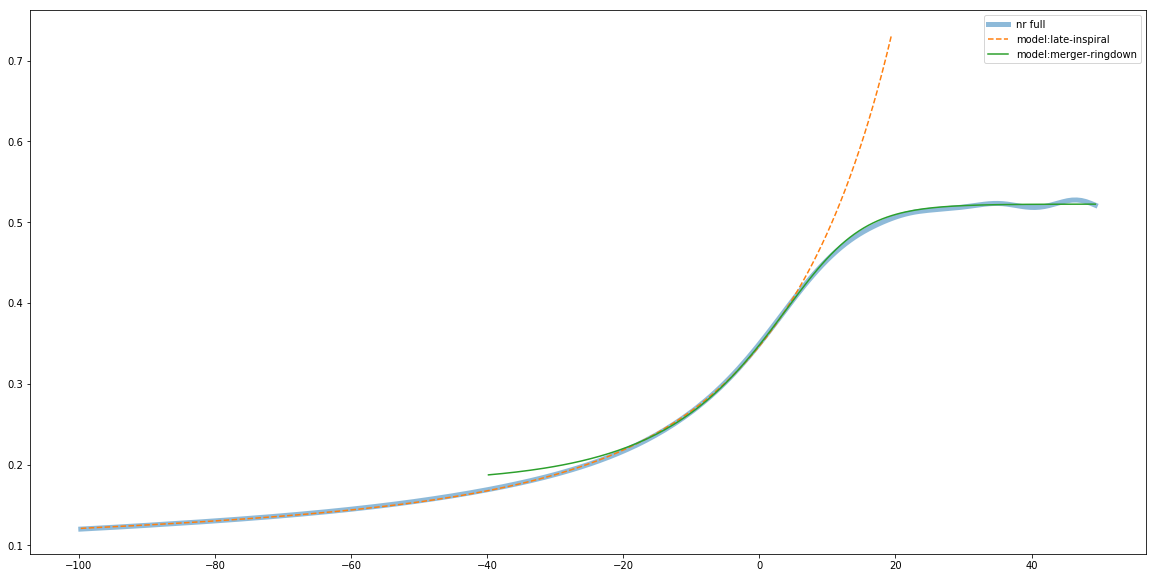

In [66]:

plt.figure(figsize=(20,10))

mask = (nrdata[0].times > -100) & (nrdata[0].times < 50)
plt.plot(nrdata[0].times[mask], -h22freq[mask], label='nr full',
        alpha=0.5, lw=5)

mask = (nrdata[0].times > -100) & (nrdata[0].times < 20)
# plt.plot(nrdata[0].times[mask], -h22freq[mask], label='nr fit region')
xx = nrdata[0].times[mask]
plt.plot(xx,fcn2min(result.params, xx, 0), label='model:late-inspiral', ls='--')


mask = (nrdata[0].times > -40) & (nrdata[0].times < 50)
xx = nrdata[0].times[mask]
plt.plot(xx,fcn2min_sam(result_sam.params, xx, 0), label='model:merger-ringdown')

plt.legend()

### Cauchy hazard functions

In [67]:
def cauchy(x, x0, s):
    num = 1.
    den = s * np.pi * ( 1 + ((x-x0)/s)**2 )
    return num/den

In [68]:
def haz_cum(x):
    return -np.log(0.5 - np.arctan(x)/np.pi)

In [69]:
def haz_cum_hyper(x):
    return -np.log(0.5 - np.tanh(x)/np.pi)

In [70]:
def haz(x):
    num = 1.
    den = (1. + x**2) * (0.5*np.pi - np.arctan(x))
    return num/den

In [71]:
def haz_hyper(x):
    num = 1.
    den = (1. + x**2) * (0.5*np.pi - np.tanh(x))
    return num/den

In [72]:
xs = np.linspace(-50,50,1000)

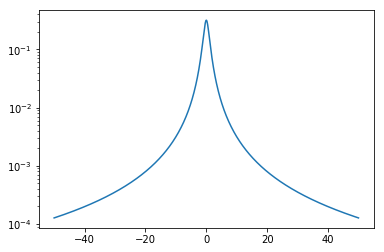

In [73]:
plt.figure()
plt.plot(xs, cauchy(xs, 0, 1))
plt.yscale('log')

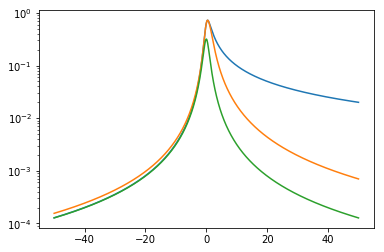

In [74]:
plt.figure()
plt.plot(xs, haz(xs))
plt.plot(xs, haz_hyper(xs))
plt.plot(xs, cauchy(xs, 0, 1))
plt.yscale('log')

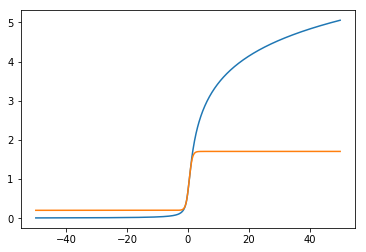

In [75]:
plt.figure()
plt.plot(xs, haz_cum(xs))
plt.plot(xs, haz_cum_hyper(xs))

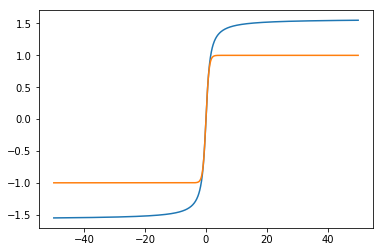

In [76]:
plt.figure()

plt.plot(xs, np.arctan(xs))
plt.plot(xs, np.tanh(xs))

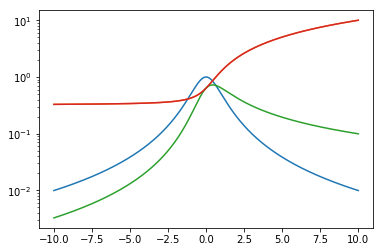

In [77]:
plt.figure()

xs = np.linspace(-10,10,1000)

aa = 1./(1+xs**2)
bb = 1./(np.pi/2. - np.arctan(xs))
# bb = 1./(np.pi/2. - np.tanh(xs))

plt.plot(xs, aa)
plt.plot(xs, bb)
plt.plot(xs, aa*bb)
plt.plot(xs, 1./(np.pi/2. - np.arctan(xs)))

plt.yscale('log')